In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Analysing data

In [2]:
#Checking data
data = pd.read_csv('Young preferences.csv')
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
pd.options.display.max_columns = 99999

In [4]:
data.shape

(1010, 150)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [6]:
data.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [7]:
data.isna().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

# 2. Data Cleaning

In [8]:
#Cleaning dataset (NaN = 0)
data_cleaned = data.fillna(value=0)
data_cleaned.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [9]:
#label with get dummies
pd.options.display.max_columns = 5
X = pd.get_dummies(data_cleaned)
X.head()

,Music,Slow songs or fast songs,...,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,3.0,...,1,0
1,4.0,4.0,...,1,0
2,5.0,5.0,...,1,0
3,5.0,3.0,...,0,1
4,5.0,3.0,...,0,1


# 3. Partioning methods

## 3.1. K-Means Method

In [10]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [11]:
# 1 cluster test

kmeans = KMeans(1)

kmeans.fit(X)

kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
len(X)

1010

In [13]:
kmeans.inertia_

1189614.177227723

In [14]:
# 2 clusters test
kmeans = KMeans(2)

kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
kmeans.inertia_

573414.423612114

In [16]:
# n clusters test
inertia = []
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    print(kmeans.inertia_)
    inertia.append(kmeans.inertia_)
    


1189614.177227723
573414.423612114
393681.59866382927
359160.79226211517
329489.3953471945
302157.5373385364
285913.97263130447
276302.64442631695
267138.420120455


Number suggested by inertia = 3-4 clusters

### 3.1.1 Using Elbow Method to double-check the number of clusters

Text(0, 0.5, 'Inertia (Distortion)')

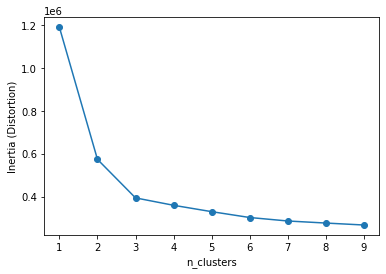

In [17]:
plt.plot(range(1,10), inertia, '-o')
plt.xlabel('n_clusters')
plt.ylabel('Inertia (Distortion)')

C:\Users\Viviam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


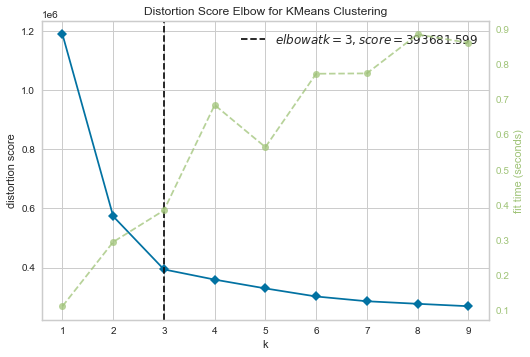

In [18]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()

Clusters suggested: 3

In [19]:
kmeans = KMeans(3)

kmeans.fit(X)

labels = kmeans.labels_

## 3.1.2. Using PCA to drop dimensions

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

pca = PCA(n_components=2)


In [21]:
#Standardize dataset
X_std = StandardScaler().fit_transform(X)

In [22]:
X_std

array([[ 0.39687397, -0.38047625, -0.92994794, ..., -0.06305667,
         0.83515208, -0.82833784],
       [-1.00959167,  0.80192687, -0.92994794, ..., -0.06305667,
         0.83515208, -0.82833784],
       [ 0.39687397,  1.98432999, -0.92994794, ..., -0.06305667,
         0.83515208, -0.82833784],
       ...,
       [-1.00959167, -0.38047625, -1.7745949 , ..., -0.06305667,
         0.83515208, -0.82833784],
       [ 0.39687397, -0.38047625, -0.08530098, ..., -0.06305667,
         0.83515208, -0.82833784],
       [ 0.39687397,  1.98432999,  0.75934598, ..., -0.06305667,
        -1.19738671,  1.2072369 ]])

In [23]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.components_

array([[-2.55289485e-02,  5.49075687e-02, -2.78823940e-02,
        -6.85107188e-02, -7.09566200e-03, -4.29386946e-02,
        -1.30599894e-01, -7.62165770e-02,  1.29805872e-02,
         7.65324712e-02,  3.35487399e-02,  3.25670883e-02,
         8.88219382e-03, -4.12134317e-02, -1.29932845e-02,
        -3.68719901e-03, -1.23056846e-01,  4.38737815e-02,
        -4.98859884e-02, -4.35149732e-03,  9.23460506e-02,
         8.93260853e-02, -2.75247629e-02, -1.79757517e-01,
         1.04817372e-01,  1.30912894e-01, -1.32611969e-01,
        -7.70185400e-02,  8.71571847e-03,  1.03413014e-01,
         1.35809028e-01,  1.87956259e-02, -6.92157434e-02,
         5.79409013e-02,  5.66664328e-02,  9.01018760e-02,
         5.96942968e-02,  1.40921000e-01,  2.73553261e-02,
        -9.69890319e-02, -5.13336861e-02, -1.35893304e-01,
         1.54697641e-02, -8.21495911e-02, -8.32382770e-02,
         2.41913685e-04,  1.42134548e-01, -1.03248592e-01,
        -6.28135778e-02, -6.97031134e-02, -1.29764279e-0

## 3.1.3. Plotting dataset

In [25]:
pc1 = pca.transform(X_std)[:,0]

In [26]:
pc2 = pca.transform(X_std)[:,1]

In [27]:
X_std_df = pd.DataFrame([pc1, pc2]).T


In [28]:
X_std_df.columns = ['pc1', 'pc2']
X_std_df

,pc1,pc2
0,-0.918321,-0.191747
1,2.458686,-2.083432
2,-1.663831,2.654057
3,-0.735278,-4.826706
4,-0.794011,0.033193
...,...,...
1005,-2.234911,0.011985
1006,3.793299,2.538159
1007,0.290737,-6.341995
1008,-2.937702,-1.352977


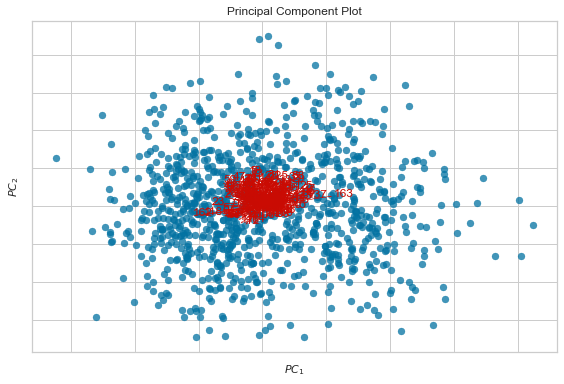

In [30]:
from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(scale=True, proj_features=True, labels=labels)
visualizer.fit_transform(pd.DataFrame(X_std))
visualizer.show()

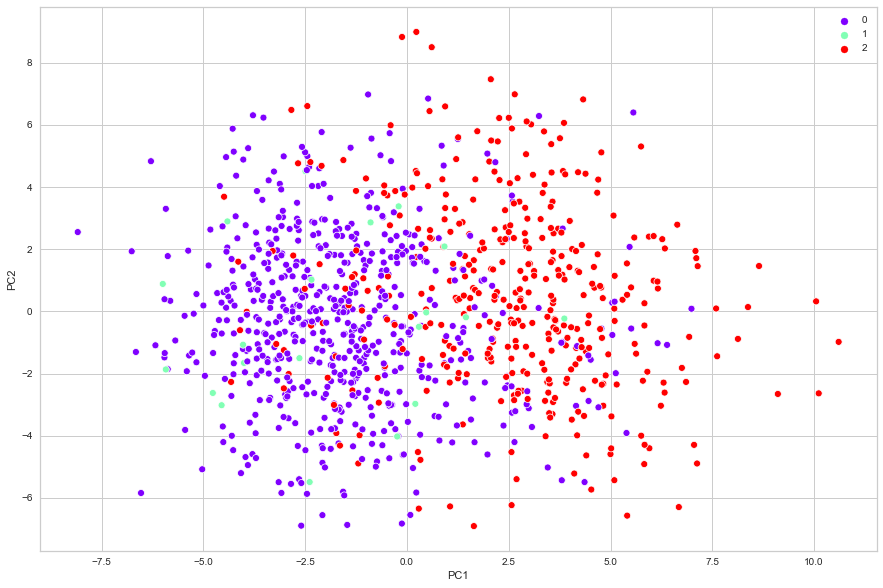

<Figure size 1440x576 with 0 Axes>

In [77]:
fig = plt.gcf()
fig.set_size_inches(15, 10)

sns.scatterplot(pc1, pc2, hue=kmeans.labels_ , palette='rainbow')

#plt.scatter(pc1, pc2, c=labels, cmap='rainbow', labels=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.figure(figsize=(20,8))

plt.show()

## 3.1.4. Analysing the results of plot

In [31]:
sorted(list(zip(pca.components_[0],data.columns)), key= lambda x: x[0])

[(-0.20652612017623162, 'Getting angry'),
 (-0.17975751685580912, 'Romantic'),
 (-0.14011046346649625, 'Storm'),
 (-0.13978221413965747, 'Shopping'),
 (-0.13890616559522612, 'Theatre'),
 (-0.1358933043870598, 'Reading'),
 (-0.1348620884679097, 'Darkness'),
 (-0.132611968569738, 'Fantasy/Fairy tales'),
 (-0.13059989370668754, 'Musical'),
 (-0.12976427868700394, 'Dancing'),
 (-0.12553616432920825, 'Daily events'),
 (-0.12545438371605275, 'Rats'),
 (-0.12409832128267605, 'Dangerous dogs'),
 (-0.12305684639570144, 'Latino'),
 (-0.1220547078869456, 'Snakes'),
 (-0.12155384205654847, 'Spiders'),
 (-0.10376474285078678, 'Loneliness'),
 (-0.1035731091234936, 'Judgment calls'),
 (-0.10324859218501375, 'Art exhibitions'),
 (-0.0995851058636087, 'Appearence and gestures'),
 (-0.09698903190389817, 'Biology'),
 (-0.09572932697839318, 'Health'),
 (-0.09533551652876478, 'Celebrities'),
 (-0.09357427715159715, 'Empathy'),
 (-0.08886647983966191, 'Gardening'),
 (-0.08750274732858596, 'Flying'),
 (-0.08

In [32]:
sorted(list(zip(pca.components_[1],data.columns)), key= lambda x: x[0])

[(-0.09916544176838166, 'Fear of public speaking'),
 (-0.0937690884772821, 'Children'),
 (-0.08770387642142286, 'Achievements'),
 (-0.07455519408742599, 'Punctuality'),
 (-0.06450768163502099, 'Cheating in school'),
 (-0.061784492470479756, 'Snakes'),
 (-0.060659177656312416, 'Dangerous dogs'),
 (-0.05997852930052442, 'Spiders'),
 (-0.05684335595027577, 'Heights'),
 (-0.05614965183736445, 'Rats'),
 (-0.056005695749389885, 'Compassion to animals'),
 (-0.05523860029384284, 'Borrowed stuff'),
 (-0.05522773318255168, 'Darkness'),
 (-0.05228957868598143, 'Energy levels'),
 (-0.05174072371968186, 'Celebrities'),
 (-0.05126353098624088, 'Ageing'),
 (-0.04870575069345385, 'Getting angry'),
 (-0.041428194698272545, 'Storm'),
 (-0.03418672089055806, 'Funniness'),
 (-0.030838868491273194, 'Age'),
 (-0.028126392003297775, 'Flying'),
 (-0.02333854685341762, 'Self-criticism'),
 (-0.023142487902394152, 'Friends versus money'),
 (-0.02259396840876979, 'Shopping'),
 (-0.022469955232133115, 'Interests o

## 3.1.5. Conclusion

K-mean's method divided the dataset into 3 clusters and it's been used PCA to diminish the dimensions of the dataset:

- Blue and Red: two majors groups that have been divided by inconclusive factor as all hobbies and tastes mingle altogether without any visible reason. 

- Green: the tiniest group of dataset and it seems to represent outliers.

It's necessary to clean more the data or categorize more to see the pattern of divison.

## 3.2. Hierarchical technique

## 3.2.1. Plotting dendrogram

In [33]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy

<Figure size 1080x720 with 0 Axes>

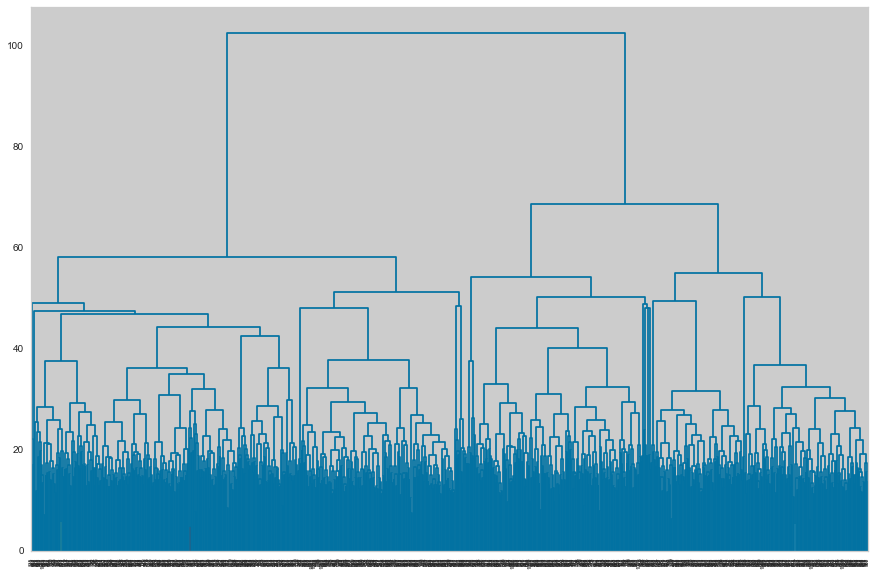

<Figure size 1080x720 with 0 Axes>

In [73]:
fig = plt.gcf()
fig.set_size_inches(15, 10)

dendrogram = hierarchy.dendrogram(hierarchy.linkage(StandardScaler().fit_transform(X), 
                                                    method = 'ward'), color_threshold=6, truncate_mode='level')
plt.figure(figsize=(15,10))

## 3.2.2. Agglomerative Clustering to investigate further

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
#Using 3 clusters as before
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [62]:
clustering.labels_

array([2, 2, 0, ..., 0, 2, 0], dtype=int64)

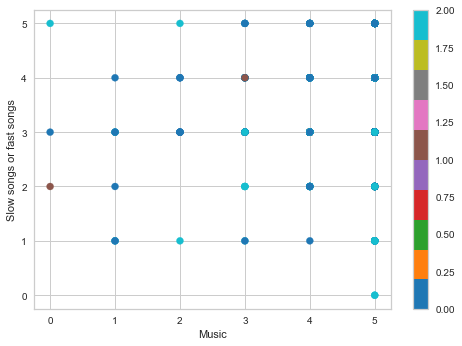

In [63]:
#Plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clustering.labels_, cmap='tab10')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar();

## 3.2.3 Selecting distance to Agglomerative Clustering

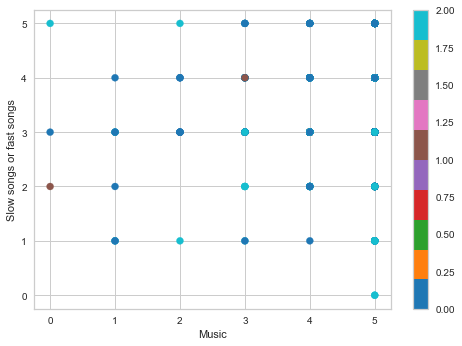

In [57]:
#Manhattan
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='complete')
hierarchical.fit(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clustering.labels_, cmap='tab10')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar();

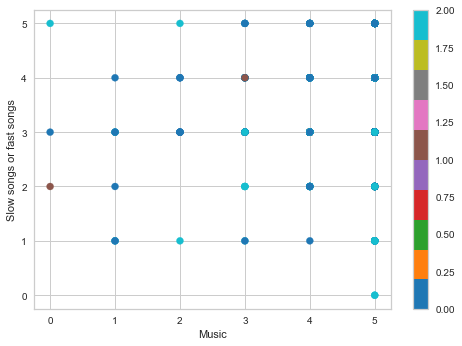

In [64]:
#Cosine
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
hierarchical.fit(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clustering.labels_, cmap='tab10')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar();

## 3.2.4. Conclusion

As said before, it's inconclusive to know the pattern utilized by the algorithm because of the dataset, which needs to be manipulated/cleaned more.

It been used both dendrogram and agglomerative clustering to see the patterns. The former is distorted on the base and it cannot be seen and the latter considered only two columns (Slow song or fast songs and Music) to be analyzed.

The distances tried are Euclidean, Manhattan and cosine but it wasn't possible to see any difference with these distances. The colors were still the same for all distances.  